In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Read Image in grayscal**

   Sprayed img shape: (1107, 1814) -- Size: 2008098
No Sprayed img shape: (1115, 1727) -- Size: 1925605


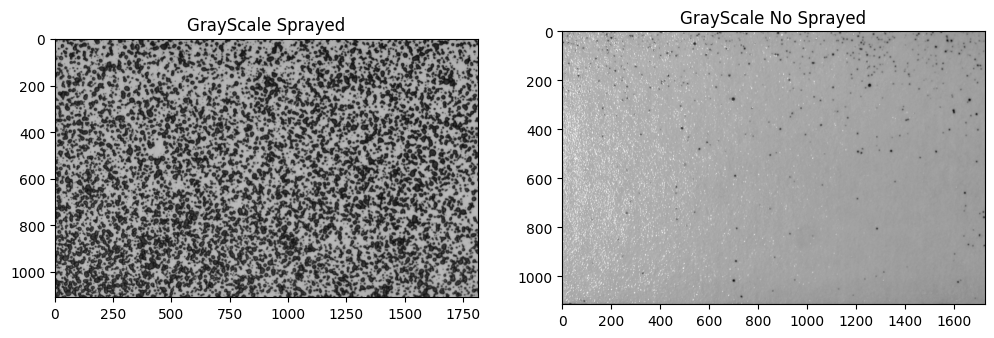

In [2]:
path_image_sprayed = 'D:\Descargas\crop\crop_fill_rotate_DSC_0206.jpg'
path_image_no_sprayed = 'D:\Descargas\crop\crop_nofill_DSC_0206.jpg'

img_gray_sprayed = cv2.imread(path_image_sprayed, cv2.IMREAD_GRAYSCALE)
img_gray_no_sprayed = cv2.imread(path_image_no_sprayed, cv2.IMREAD_GRAYSCALE)

print('   Sprayed img shape: {} -- Size: {}\nNo Sprayed img shape: {} -- Size: {}'.format(img_gray_sprayed.shape, img_gray_sprayed.size ,img_gray_no_sprayed.shape, img_gray_no_sprayed.size))

plt.figure(figsize=[12,4])
plt.subplot(1,2,1); plt.imshow(img_gray_sprayed, cmap='gray'); plt.title('GrayScale Sprayed');
plt.subplot(1,2,2); plt.imshow(img_gray_no_sprayed, cmap='gray'); plt.title('GrayScale No Sprayed');

# plt.imshow(img_gray_sprayed, cmap='gray')

plt.show()


**Resizing image**

   Sprayed img shape: (1107, 1814) -- Size: 2008098
No Sprayed img shape: (1107, 1814) -- Size: 2008098


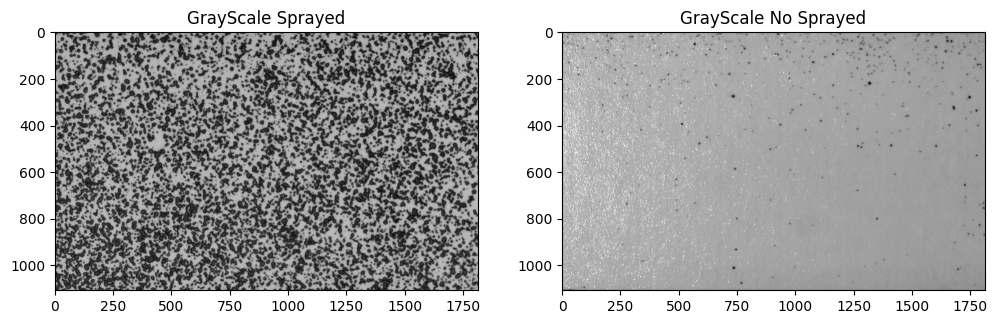

In [3]:
## Resizing No Sprayed image
desired_height = img_gray_sprayed.shape[0]
desired_width = img_gray_sprayed.shape[1]
dim = (desired_width, desired_height)

resize_img_gray_no_sprayed = cv2.resize(img_gray_no_sprayed, dsize=dim, interpolation=cv2.INTER_AREA)

print('   Sprayed img shape: {} -- Size: {}\nNo Sprayed img shape: {} -- Size: {}'.format(img_gray_sprayed.shape, img_gray_sprayed.size, resize_img_gray_no_sprayed.shape, resize_img_gray_no_sprayed.size))

plt.figure(figsize=[12,4])
plt.subplot(1,2,1); plt.imshow(img_gray_sprayed, cmap='gray'); plt.title('GrayScale Sprayed');
plt.subplot(1,2,2); plt.imshow(resize_img_gray_no_sprayed, cmap='gray'); plt.title('GrayScale No Sprayed');

plt.show()

**Analize Histogram**

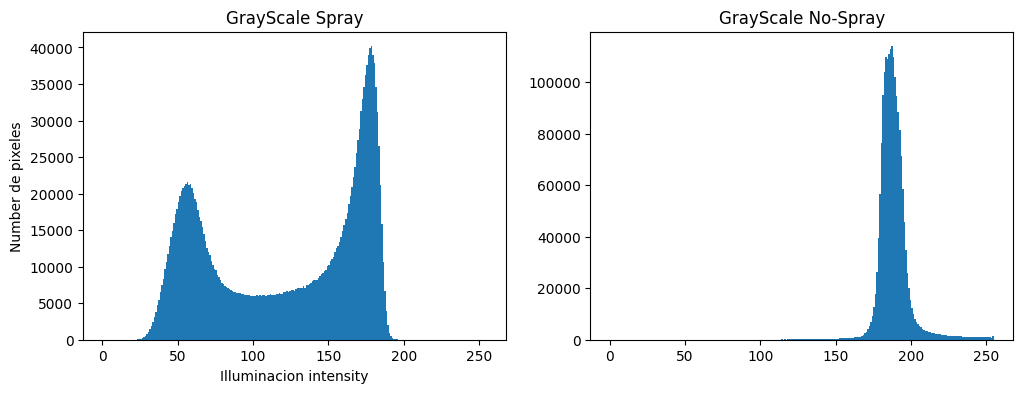

In [4]:
plt.figure(figsize=[12,4])

plt.subplot(1,2,1); plt.hist(img_gray_sprayed.ravel(), bins=range(256)); plt.title('GrayScale Spray');
plt.ylabel('Number de pixeles')
plt.xlabel('Illuminacion intensity')
plt.subplot(1,2,2); plt.hist(img_gray_no_sprayed.ravel(), bins=range(256)); plt.title('GrayScale No-Spray');

plt.show()

**Adding Tresholding**

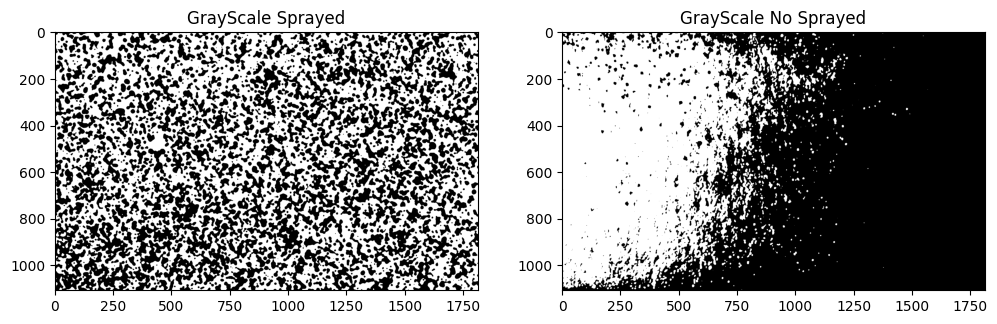

In [5]:
## Blur filter
blur_spray = cv2.GaussianBlur(img_gray_sprayed, (7,7), cv2.BORDER_DEFAULT)
blur_no_spray = cv2.GaussianBlur(resize_img_gray_no_sprayed, (7,7), cv2.BORDER_DEFAULT)

## Otsu Thresholding
retval_, tresh_otsu_spray = cv2.threshold(blur_spray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
retval_, tresh_otsu_no_spray = cv2.threshold(blur_no_spray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1); plt.imshow(tresh_otsu_spray, cmap='gray'); plt.title('GrayScale Sprayed');
plt.subplot(1,2,2); plt.imshow(tresh_otsu_no_spray, cmap='gray'); plt.title('GrayScale No Sprayed');

# plt.imshow(tresh_otsu, cmap='gray')
plt.show()

**Change threshold for No-Spray image**

*El parámetro para establecer el límite entre convertir los pixeles a 0 o 255 se extrajo de analizar el histograma de la imagen.*

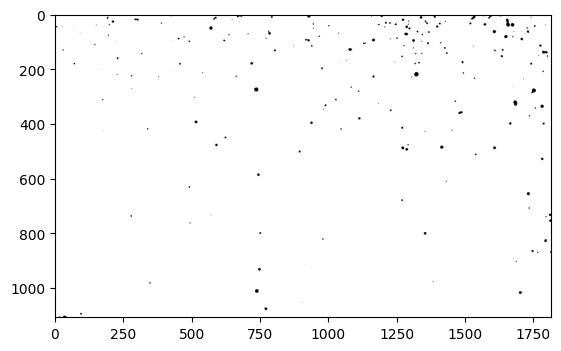

In [6]:
## Another threshold for NO Srapy image
retval_, thresh_binary_no_spray = cv2.threshold(blur_no_spray, 155, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_binary_no_spray, cmap='gray')
plt.show()

**Histogram Image Function**

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]


*   **images:** *imagen de estrada, puede ser a escala de grises o colores.*
*   **channels:** *índice de canal para el cual deseamos calcular el histograma, en una imagen a escala de grises [0], si la imagen es a colores podemos indicar [0], [1], [2] para los canales B, G, R respectivamente.*
*   **mask:** *mascara que define la región sobre la que deseamos calcular el histograma, es opcional.*
*   **histSize:** *intensidad máxima, para nosotros [256].*
*   **ranges:** *nuestro rango de valores, usaremos [0, 256].*


http://acodigo.blogspot.com/2017/08/histogramas-opencv-python.html

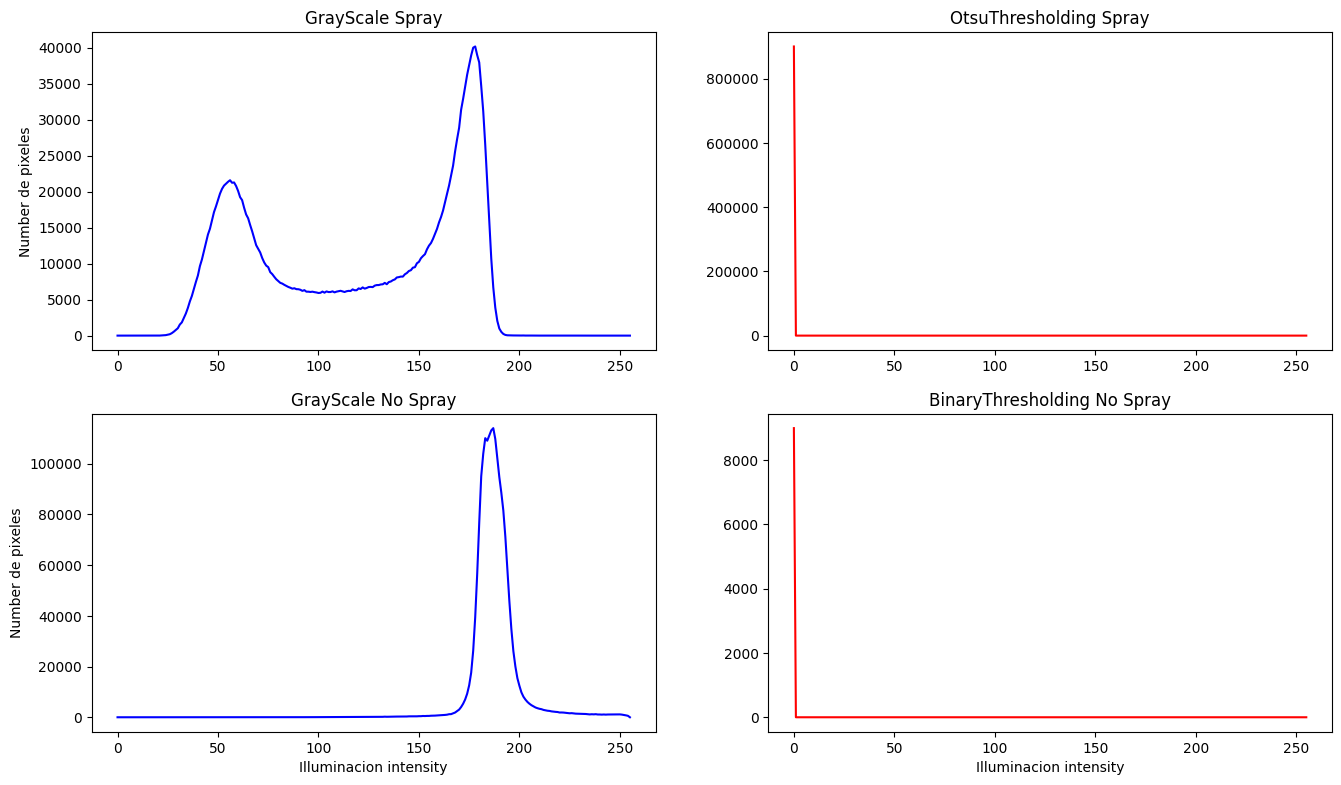

In [7]:
## Histograms
hist_spray = cv2.calcHist([img_gray_sprayed], [0], None, [256], [0, 255])
hist_tresh_spray = cv2.calcHist([tresh_otsu_spray], [0], None, [256], [0, 255])

hist_no_spray = cv2.calcHist([img_gray_no_sprayed], [0], None, [256], [0, 255])
hist_tresh_no_spray = cv2.calcHist([thresh_binary_no_spray], [0], None, [256], [0, 255])

## Plot
plt.figure(figsize=[16,19])

plt.subplot(4,2,1); plt.plot(hist_spray, color='blue'); plt.title('GrayScale Spray');
plt.ylabel('Number de pixeles')
plt.subplot(4,2,2); plt.plot(hist_tresh_spray, color='red'); plt.title('OtsuThresholding Spray');
plt.subplot(4,2,3); plt.plot(hist_no_spray, color='blue'); plt.title('GrayScale No Spray');
plt.ylabel('Number de pixeles')
plt.xlabel('Illuminacion intensity')
plt.subplot(4,2,4); plt.plot(hist_tresh_no_spray, color='red'); plt.title('BinaryThresholding No Spray');
plt.xlabel('Illuminacion intensity')

plt.show()

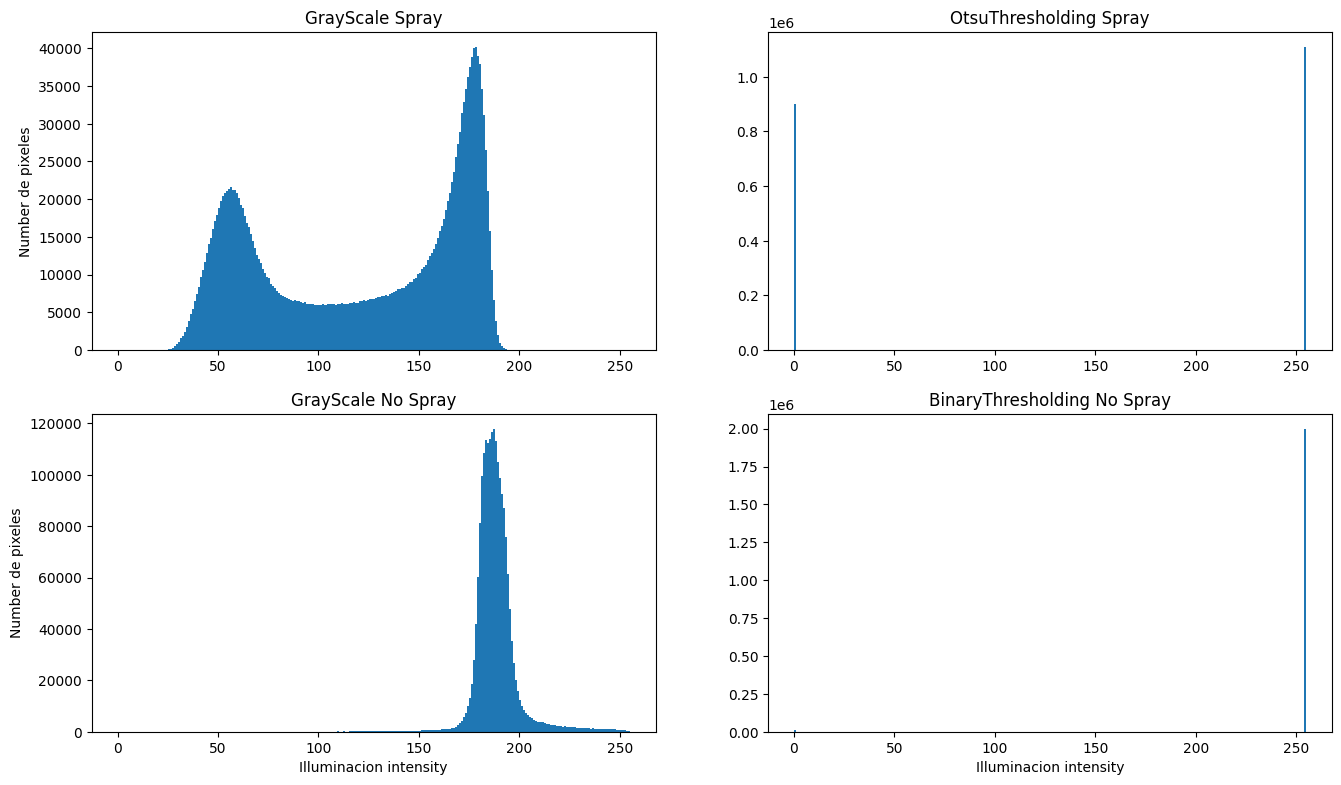

In [8]:
## Another representation (Better)
plt.figure(figsize=[16,19])

plt.subplot(4,2,1); plt.hist(img_gray_sprayed.ravel(), bins=range(256)); plt.title('GrayScale Spray');
plt.ylabel('Number de pixeles')
plt.subplot(4,2,2); plt.hist(tresh_otsu_spray.ravel(), bins=range(256)); plt.title('OtsuThresholding Spray');
plt.subplot(4,2,3); plt.hist(resize_img_gray_no_sprayed.ravel(), bins=range(256)); plt.title('GrayScale No Spray');
plt.ylabel('Number de pixeles')
plt.xlabel('Illuminacion intensity')
plt.subplot(4,2,4); plt.hist(thresh_binary_no_spray.ravel(), bins=range(256)); plt.title('BinaryThresholding No Spray');
plt.xlabel('Illuminacion intensity')

plt.show()

**Calculate Black and NonBlack pixels percentaje**

In [10]:
## Pixels Not Black(NonZeros) in image
pixels_not_black_spray = cv2.countNonZero(tresh_otsu_spray)
pixels_not_black_nospray = cv2.countNonZero(thresh_binary_no_spray)

## Pixels percentaje NOT Black
not_black_percentage_spray = (pixels_not_black_spray / img_gray_sprayed.size) * 100
not_black_percentage_nospray = (pixels_not_black_nospray / resize_img_gray_no_sprayed.size) * 100

## Pixels percentaje Black
black_percentage_spray = 100 - not_black_percentage_spray
black_percentage_nospray = 100 - not_black_percentage_nospray

print("Pixeles No Negros en imagen fumigada: {:.2f}%".format(not_black_percentage_spray))
print("Pixeles Negros en imagen fumigada: {:.2f}%".format(black_percentage_spray))
print("-" * 50)
print("Pixeles No Negros en imagen NO fumigada: {:.2f}%".format(not_black_percentage_nospray))
print("Pixeles Negros en imagen NO fumigada: {:.2f}%".format(black_percentage_nospray))

Pixeles No Negros en imagen fumigada: 55.20%
Pixeles Negros en imagen fumigada: 44.80%
--------------------------------------------------
Pixeles No Negros en imagen NO fumigada: 99.55%
Pixeles Negros en imagen NO fumigada: 0.45%
